In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import math
from scipy.stats import norm

In [2]:
#supply chain game
#ES3
L = 2
b = 4
h = 1
z = norm.ppf(b/(b+h))

In [4]:
alpha = [0.0]
std_OR =[0.0]
std_IR =[0.0]
std_OW =[0.0]
std_IW =[0.0]
std_OD =[0.0]
std_ID =[0.0]
std_OM =[0.0]
std_IM =[0.0]

for a in range(1,10):
    alpha.append(a/10)

    #Retailer
    DR = [0.0, 10.0]
    Dlist = [9, 12, 8, 11]
    for j in range(1, 501):
        DR.extend(Dlist)
    i = 1
    FR = [0, 10.0]
    OR = [10.0]
    IR = [10.0]
    IPR = [10+10*L]
    BR = [0.0]

    for k in range(0,2001):
        FR.append(0.0)

    for l in range(0,2002):   
        OR.append(0.0)
        IR.append(0.0)
        IPR.append(0.0)
        BR.append(0.0)

    for i in range(1,2000):
        FR[i+1] = (1-alpha[a]) * FR[i] + alpha[a]*DR[i]

    for i in range(1,2001):
        if i-L-1 < 0:
            IR[i] = IR[i-1] + 0 - DR[i]
            IPR[i] = IPR[i-1] + OR[i-1] - DR[i]
            if i == 1:
                var_DR = 0 
            else:    
                mean_DR = np.mean(DR[1:i])
                var_DR = np.var(DR[1:i])
            BR[i] = (L+1)*FR[i+1] + z * math.sqrt((L+1)*var_DR)
            OR[i] = max(BR[i]-IPR[i], 0)

        else:    
            IR[i] = IR[i-1] + OR[i-L-1] - DR[i]
            IPR[i] = IPR[i-1] + OR[i-1] - DR[i]
            if i == 1:
                var_DR = 0 
            else:    
                mean_DR = np.mean(DR[1:i])
                var_DR = np.var(DR[1:i])
            BR[i] = (L+1)*FR[i+1] + z * math.sqrt((L+1)*var_DR)
            OR[i] = max(BR[i]-IPR[i], 0)
    
    std_OR.append(np.std(OR[1001:2000]))
    std_IR.append(np.std(IR[1001:2000]))
     
    #wholesaler
    i = 1
    FW = [0, 10.0]
    OW = [10.0]
    IW = [10.0]
    IPW = [10+10*L]
    BW = [0.0]

    for k in range(0,2001):
        FW.append(0.0)

    for l in range(0,2002):   
        OW.append(0.0)
        IW.append(0.0)
        IPW.append(0.0)
        BW.append(0.0)

    for i in range(1,2000):
        FW[i+1] = (1-alpha[a]) * FW[i] + alpha[a]*OR[i-1]

    for i in range(1,2001):
        if i-L-1 < 0:
            IW[i] = IW[i-1] + 0 - OR[i-1]
            IPW[i] = IPW[i-1] + OW[i-1] - OR[i-1]
            if i == 1:
                var_DW = 0 
            else:    
                mean_DW = np.mean(OR[1:i])
                var_DW = np.var(OR[1:i])
            BW[i] = (L+1)*FW[i+1] + z * math.sqrt((L+1)*var_DW)
            OW[i] = max(BW[i]-IPW[i], 0)

        else:    
            IW[i] = IW[i-1] + OW[i-L-1] - OR[i-1]
            IPW[i] = IPW[i-1] + OW[i-1] - OR[i-1]
            if i == 1:
                var_DW = 0 
            else:    
                mean_DW = np.mean(OR[1:i])
                var_DW = np.var(OR[1:i])
            BW[i] = (L+1)*FW[i+1] + z * math.sqrt((L+1)*var_DW)
            OW[i] = max(BW[i]-IPW[i], 0)
    
    std_OW.append(np.std(OW[1001:2000]))
    std_IW.append(np.std(IW[1001:2000]))
    
    
    #distributor
    i = 1
    FD = [0, 10.0]
    OD = [10.0]
    ID = [10.0]
    IPD = [10+10*L]
    BD = [0.0]

    for k in range(0,2001):
        FD.append(0.0)

    for l in range(0,2002):   
        OD.append(0.0)
        ID.append(0.0)
        IPD.append(0.0)
        BD.append(0.0)

    for i in range(1,2000):
        FD[i+1] = (1-alpha[a]) * FD[i] + alpha[a]*OW[i-1]

    for i in range(1,2001):
        if i-L-1 < 0:
            ID[i] = ID[i-1] + 0 - OW[i-1]
            IPD[i] = IPD[i-1] + OD[i-1] - OW[i-1]
            if i == 1:
                var_DD = 0 
            else:    
                mean_DD = np.mean(OW[1:i])
                var_DD = np.var(OW[1:i])
            BD[i] = (L+1)*FD[i+1] + z * math.sqrt((L+1)*var_DD)
            OD[i] = max(BD[i]-IPD[i], 0)

        else:    
            ID[i] = ID[i-1] + OD[i-L-1] - OW[i-1]
            IPD[i] = IPD[i-1] + OD[i-1] - OW[i-1]
            if i == 1:
                var_DD = 0 
            else:    
                mean_DD = np.mean(OW[1:i])
                var_DD = np.var(OW[1:i])
            BD[i] = (L+1)*FD[i+1] + z * math.sqrt((L+1)*var_DD)
            OD[i] = max(BD[i]-IPD[i], 0)
    
    std_OD.append(np.std(OD[1001:2000]))
    std_ID.append(np.std(ID[1001:2000]))

    
    #manufacturer
    i = 1
    FM = [0, 10.0]
    OM = [10.0]
    IM = [10.0]
    IPM = [10+10*L]
    BM = [0.0]

    for k in range(0,2001):
        FM.append(0.0)

    for l in range(0,2002):   
        OM.append(0.0)
        IM.append(0.0)
        IPM.append(0.0)
        BM.append(0.0)

    for i in range(1,2000):
        FM[i+1] = (1-alpha[a]) * FM[i] + alpha[a]*OD[i-1]

    for i in range(1,2001):
        if i-L-1 < 0:
            IM[i] = IM[i-1] + 0 - OD[i-1]
            IPM[i] = IPM[i-1] + OM[i-1] - OD[i-1]
            if i == 1:
                var_DM = 0 
            else:    
                mean_DM = np.mean(OD[1:i])
                var_DM = np.var(OD[1:i])
            BM[i] = (L+1)*FM[i+1] + z * math.sqrt((L+1)*var_DM)
            OM[i] = max(BM[i]-IPM[i], 0)

        else:    
            IM[i] = IM[i-1] + OM[i-L-1] - OD[i-1]
            IPM[i] = IPM[i-1] + OM[i-1] - OD[i-1]
            if i == 1:
                var_DM = 0 
            else:    
                mean_DM = np.mean(OD[1:i])
                var_DM = np.var(OD[1:i])
            BM[i] = (L+1)*FM[i+1] + z * math.sqrt((L+1)*var_DM)
            OM[i] = max(BM[i]-IPM[i], 0)
    
    std_OM.append(np.std(OM[1001:2000]))
    std_IM.append(np.std(IM[1001:2000]))


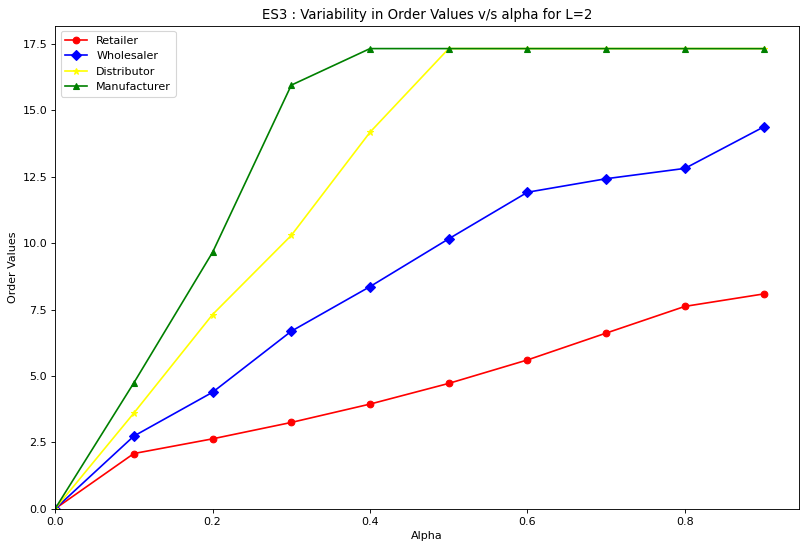

In [5]:
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(alpha, std_OR, c ='red', marker = 'o', label = "Retailer")
plt.plot(alpha, std_OW, c ='blue', marker = 'D', label = "Wholesaler")
plt.plot(alpha, std_OD, c ='yellow', marker = '*', label = "Distributor")
plt.plot(alpha, std_OM, c ='green', marker = '^', label = "Manufacturer")
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.title("ES3 : Variability in Order Values v/s alpha for L=2")
plt.xlabel('Alpha')
plt.ylabel('Order Values')
plt.legend()

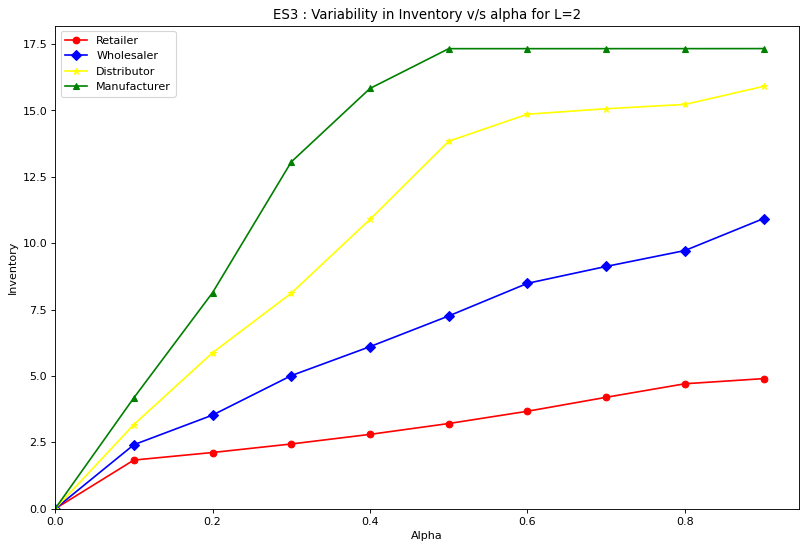

In [6]:
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(alpha, std_IR, c ='red',marker = 'o', label = "Retailer")
plt.plot(alpha, std_IW, c ='blue', marker = 'D', label = "Wholesaler")
plt.plot(alpha, std_ID, c ='yellow', marker = '*', label = "Distributor")
plt.plot(alpha, std_IM, c ='green', marker = '^', label = "Manufacturer")
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.title("ES3 : Variability in Inventory v/s alpha for L=2")
plt.xlabel('Alpha')
plt.ylabel('Inventory')
plt.legend()